# LOUC

## Load data

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.set()
pd.set_option('display.max_columns', None)

In [2]:
data = pkl.load(open('data/data.pkl','rb'))
data.head()

,user_id,exp_id,sch_id_1,sch_id_2,pair,realconf,rec_time,time,userconf,user_sub_val,user_ans_is_match,mouse_loc,order,token_path,term_match,word_net
0,171,14,134,180,"(134, 180)",0,2020-12-19 12:28:39,26,34,67,1,"(1608373691424,1094.4655929721816,406.656,true...",1,0.484821,0.619156,1.0
1,171,14,134,182,"(134, 182)",0,2020-12-19 12:28:45,6,38,69,1,"(1608373716894,897.6866764275256,593.28,true,f...",2,0.454945,0.578095,1.0
2,171,14,153,183,"(153, 183)",1,2020-12-19 12:28:54,9,24,38,0,"(1608373722986,1006.3836017569546,669.312,true...",3,0.552425,0.397624,1.0
3,171,14,149,180,"(149, 180)",0,2020-12-19 12:28:57,3,14,57,1,"(1608373731943,1093.528550512445,667.008,true,...",4,0.502679,0.619156,1.0
4,171,14,163,176,"(163, 176)",1,2020-12-19 12:29:01,4,24,62,1,"(1608373734940,1104.7730600292825,660.096,true...",5,0.570769,0.650000,1.0


### Normalize confidence and filter outliers

In [3]:
data['userconf'] /= 100

In [4]:
time_describe = data[['time']].describe()
lower_bound = max(0, time_describe.loc['mean'].item() - 2 * time_describe.loc['std'].item())
upper_bound = time_describe.loc['mean'].item() + 2 * time_describe.loc['std'].item()
problematic_users = data[(lower_bound > data['time']) | (data['time'] > upper_bound)]['user_id'].unique()
data = data[~data['user_id'].isin(problematic_users)].reset_index(drop=True)
data.head()

,user_id,exp_id,sch_id_1,sch_id_2,pair,realconf,rec_time,time,userconf,user_sub_val,user_ans_is_match,mouse_loc,order,token_path,term_match,word_net
0,174,14,134,180,"(134, 180)",0,2020-12-19 12:37:19,14,0.40,30,0,"(1608374227475,744.9493142516399,642.208883553...",1,0.484821,0.619156,1.0
1,174,14,134,182,"(134, 182)",0,2020-12-19 12:37:28,9,0.24,38,0,"(1608374241158,1025.0685748360168,622.32893157...",2,0.454945,0.578095,1.0
2,174,14,153,183,"(153, 183)",1,2020-12-19 12:37:38,10,0.20,40,0,"(1608374250764,799.1413237924866,670.732292917...",3,0.552425,0.397624,1.0
3,174,14,149,180,"(149, 180)",0,2020-12-19 12:37:46,8,0.14,43,0,"(1608374260455,799.1413237924866,649.123649459...",4,0.502679,0.619156,1.0
4,174,14,163,176,"(163, 176)",1,2020-12-19 12:37:51,5,0.10,55,1,"(1608374268412,883.8640429338104,583.433373349...",5,0.570769,0.650000,1.0


## Evaluation columns

In [5]:
data['confusion'] = pd.Series(dtype=float)
data.loc[(data['user_ans_is_match']==1)&(data['realconf']==1), 'confusion'] = 'TP'
data.loc[(data['user_ans_is_match']==1)&(data['realconf']==0), 'confusion'] = 'FP'
data.loc[(data['user_ans_is_match']==0)&(data['realconf']==0), 'confusion'] = 'TN'
data.loc[(data['user_ans_is_match']==0)&(data['realconf']==1), 'confusion'] = 'FN'

data['correct'] = (data['user_ans_is_match'] == data['realconf']).astype(int)

In [6]:
data.head()

,user_id,exp_id,sch_id_1,sch_id_2,pair,realconf,rec_time,time,userconf,user_sub_val,user_ans_is_match,mouse_loc,order,token_path,term_match,word_net,confusion,correct
0,174,14,134,180,"(134, 180)",0,2020-12-19 12:37:19,14,0.40,30,0,"(1608374227475,744.9493142516399,642.208883553...",1,0.484821,0.619156,1.0,TN,1
1,174,14,134,182,"(134, 182)",0,2020-12-19 12:37:28,9,0.24,38,0,"(1608374241158,1025.0685748360168,622.32893157...",2,0.454945,0.578095,1.0,TN,1
2,174,14,153,183,"(153, 183)",1,2020-12-19 12:37:38,10,0.20,40,0,"(1608374250764,799.1413237924866,670.732292917...",3,0.552425,0.397624,1.0,FN,0
3,174,14,149,180,"(149, 180)",0,2020-12-19 12:37:46,8,0.14,43,0,"(1608374260455,799.1413237924866,649.123649459...",4,0.502679,0.619156,1.0,TN,1
4,174,14,163,176,"(163, 176)",1,2020-12-19 12:37:51,5,0.10,55,1,"(1608374268412,883.8640429338104,583.433373349...",5,0.570769,0.650000,1.0,TP,1


## LOUC - Leave One Out Calibration

In [7]:
def LOUC_pre(tdf):
    conf_exc = (tdf[tdf['confusion'].isin(['TP', 'FP'])]['userconf'].sum() - tdf['userconf']*tdf['confusion'].isin(['TP', 'FP'])) / (len(tdf[tdf['confusion'].isin(['TP', 'FP'])]) - tdf['confusion'].isin(['TP', 'FP']))
    prec_exc = (len(tdf[tdf['confusion']=='TP']) - (tdf['confusion']=='TP')) / ((len(tdf[tdf['confusion'].isin(['TP', 'FP'])])) - (tdf['confusion'].isin(['TP', 'FP'])))
    cali_exc = conf_exc - prec_exc
    cali_inc = tdf[tdf['confusion'].isin(['TP', 'FP'])]['userconf'].mean() - (len(tdf[tdf['confusion']=='TP']) / len(tdf[tdf['confusion'].isin(['TP', 'FP'])]))
    return abs(cali_inc) - abs(cali_exc)

In [8]:
def LOUC_acc(tdf):
    conf_exc = (tdf['userconf'].sum() - tdf['userconf']) / (len(tdf) - 1)
    acc_exc = (tdf['correct'].sum() - tdf['correct']) / (len(tdf) - 1)
    cali_exc = conf_exc - acc_exc
    cali_inc = tdf['userconf'].mean() - tdf['correct'].mean()
    return abs(cali_inc) - abs(cali_exc)

In [9]:
# For each answering, calulcating its answering time delta from users avergae delta.
# For example, lets say that user A is usually 4 sec faster than the average answering time.
# Then, there's a question in which she was 6 sec faster. This question was probabley easier for her, and its time delta will be -2.
tdata = data.copy()
questions_mtime = tdata.groupby('order')['time'].mean()
tdata = tdata.join(questions_mtime, on='order',rsuffix=' mean')
tdata['time delta'] = tdata['time'] - tdata['time mean']
users_mdelta = tdata.groupby('user_id')['time delta'].mean()
tdata = tdata.join(users_mdelta, on='user_id',rsuffix=' mean')
tdata['delta from delta'] = tdata['time delta'] - tdata['time delta mean']
data.insert(8, 'time_delta', tdata['delta from delta'])

In [10]:
class CP: #color plot
    def __init__(self, cn=None, cr=None, xlabel=None, ylabel=None, ltitle=None, addtitle=None, **kwargs):
        cmaps = {'D':'coolwarm',
         'S':'Blues',
         'T': 'tab10'}
        
        self.column = cn
        self.color = cmaps.get(cr)
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.ltitle = ltitle
        self.addtitle = addtitle
        self.kwargs = kwargs
        
# Columns to cut by:
colors = [CP(),
          CP(cn='exp_id',cr='T', ltitle="Experiment", llabels=["Prolific", "Students"], addtitle=" and Experiement"), 
          # CP(cn='order',cr='S', ltitle="Q. Num"), 
          CP(cn='realconf',cr='T', ltitle="Real label", llabels=["Non-match", "Match"], addtitle=" and Real Label"), 
          # CP(cn='user_ans_is_match',cr='T', ltitle="Predicted label"), 
          # CP(cn='confusion',cr='T', ltitle="Confusion"), 
          # CP(cn='correct',cr='T', ltitle="Correct labeling")
         ]

Colored by None


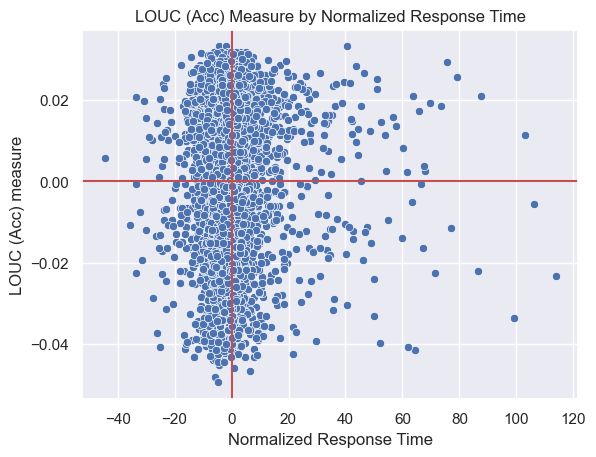

Colored by exp_id


,time_delta,-1.0,1.0
calibration_d,exp_id,,
1.0,Students,615,436
-1.0,Students,535,334
1.0,Prolific,787,541
-1.0,Prolific,694,468


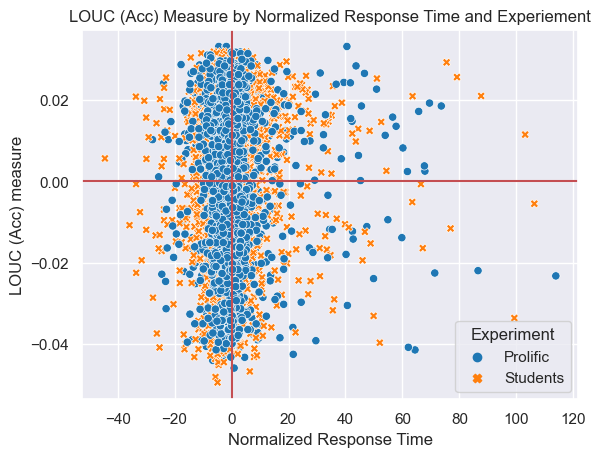

Colored by realconf


,time_delta,-1.0,1.0
calibration_d,realconf,,
1.0,Non-match,589,403
-1.0,Non-match,750,463
1.0,Match,813,574
-1.0,Match,479,339


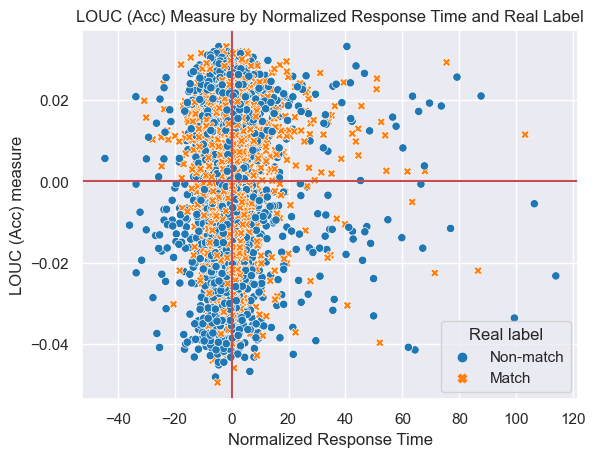

In [11]:
tdata = data.copy()
louc = "Acc"
name = f"LOUC ({louc})"
func = LOUC_acc if louc=="Acc" else LOUC_pre
tdata['calibration_d'] = tdata.groupby('user_id').apply(func).reset_index(drop=True)

tdata['exp_id'] = tdata['exp_id'].apply({14:'Prolific', 15:'Students'}.get)
tdata['realconf'] = tdata['realconf'].apply({0:'Non-match', 1:'Match'}.get)

# Filtering
# tdata = tdata[~tdata['user_id'].isin(tdata[tdata['delta from delta']>300]['user_id'].unique())]
# tdata = tdata[tdata['exp_id']==14]
# tdata = tdata[tdata['user_id'].isin(tdata['user_id'].unique()[1:5])]
# tdata = tdata[tdata['order']==12]
for c in colors:
    column = c.column
    print(f"Colored by {c.column}")
    if column:
        display(pd.pivot(tdata.groupby([np.sign(tdata['time_delta']), np.sign(tdata['calibration_d']), column]).size().reset_index(), values=0, index=['calibration_d', column], columns='time_delta').sort_index(level=1, ascending=False))
    graph = sns.scatterplot(data=tdata, x='time_delta', y='calibration_d', style=column, hue=column, palette=c.color)
    title = f"{name} Measure by Normalized Response Time{c.addtitle or ''}"
    graph.set(title=title, ylabel=f"{name} measure", xlabel='Normalized Response Time')
    graph.axvline(x=0, c='r')
    graph.axhline(y=0, c='r')
    if c.xlabel: graph.set(xlabel=c.xlabel)
    if c.ylabel: graph.set(ylabel=c.ylabel)
    if c.ltitle: graph.legend(title=c.ltitle)
    plt.savefig(f"results/louc/{title}")
    plt.show()

Colored by TP


,time_delta,-1.0,1.0
calibration_d,TP,,
1.0,1.0,773,540
-1.0,1.0,307,180
1.0,0.0,99,58
-1.0,0.0,504,320


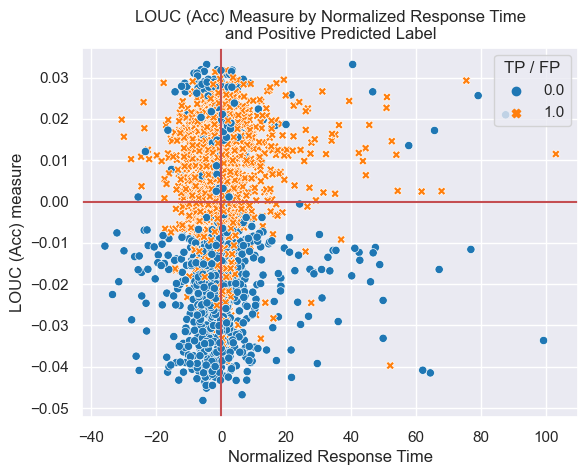

In [12]:
pdata = tdata.copy()
pdata = pdata[pdata['confusion'].isin(['TP', 'FP'])]
pdata['TP'] = (pdata['confusion'] == 'TP').astype(float)

c = CP(cn='TP',cr='T', ltitle="TP / FP", addtitle="\nand Positive Predicted Label")
column = c.column
print(f"Colored by {c.column}")
display(pd.pivot(pdata.groupby([np.sign(pdata['time_delta']), np.sign(pdata['calibration_d']), column]).size().reset_index(), values=0, index=['calibration_d', column], columns='time_delta').sort_index(level=1, ascending=False))
graph = sns.scatterplot(data=pdata, x='time_delta', y='calibration_d', style=column, hue=column, palette=c.color)
graph.set(title=f"{name} Measure by Normalized Response Time{c.addtitle or ''}", ylabel=f"{name} measure", xlabel='Normalized Response Time')
graph.axvline(x=0, c='r')
graph.axhline(y=0, c='r')

if c.xlabel: graph.set(xlabel=c.xlabel)
if c.ylabel: graph.set(ylabel=c.ylabel)
if c.ltitle: plt.legend(title=c.ltitle)

plt.savefig(f"results/louc/{name} Measure by Normalized Response Time and Positive Predicted Label")
plt.show()